In [34]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight') 
%matplotlib inline 
warnings.filterwarnings('ignore') 


In [35]:
train = pd.read_csv(r"C:\Users\HP\Downloads\train.csv") 
test = pd.read_csv(r"C:\Users\HP\Downloads\test.csv") 
train.shape 

(891, 12)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

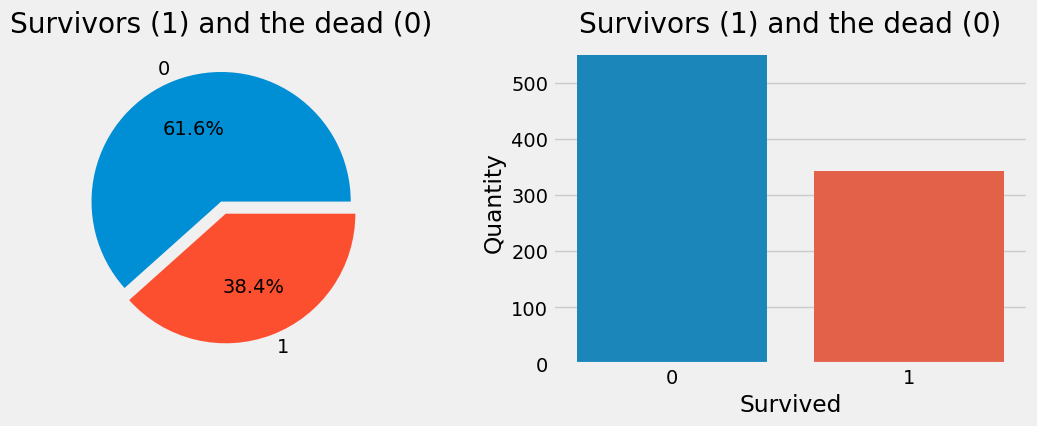

In [38]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
# Plotting pie chart
train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')

# Plotting countplot
sns.countplot(x='Survived', data=train, ax=ax[1])  # specify x='Survived'
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')

plt.show()


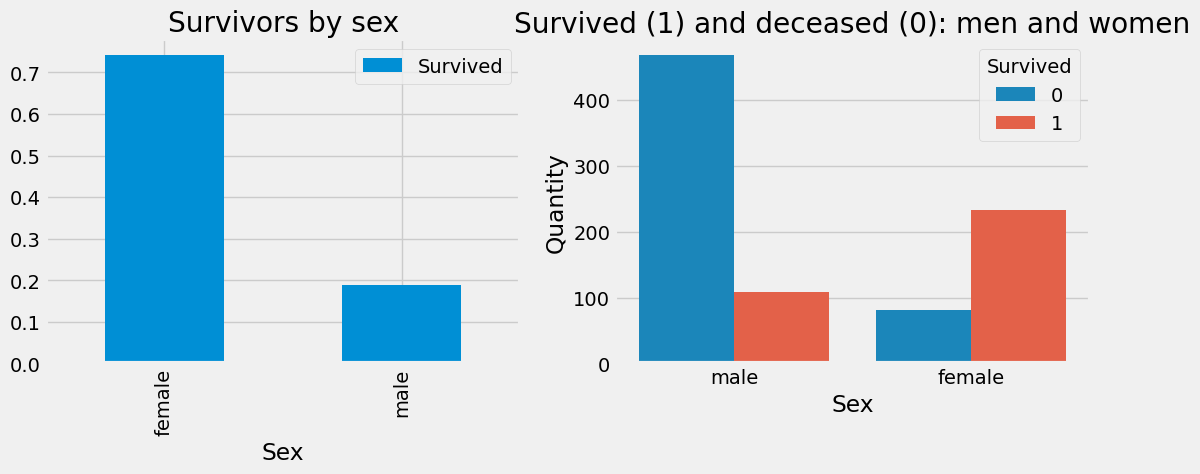

In [39]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plotting mean survival rate by sex
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')

# Plotting countplot for survival by sex
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[1])  # specify x='Sex' and hue='Survived'
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')

plt.show()


In [40]:
# Create a new column cabinbool indicating if the cabin value was given or was NaN 
train["CabinBool"] = (train["Cabin"].notnull().astype('int')) 
test["CabinBool"] = (test["Cabin"].notnull().astype('int')) 

# Delete the column 'Cabin' from test and train dataset 
train = train.drop(['Cabin'], axis=1) 
test = test.drop(['Cabin'], axis=1)


In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinBool
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [43]:
train = train.drop(['Ticket'], axis=1) 
test = test.drop(['Ticket'], axis=1) 


In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0


In [46]:
# replacing the missing values in the Embarked feature with S 
train = train.fillna({"Embarked": "S"}) 

In [47]:
# sort the ages into logical categories 
train["Age"] = train["Age"].fillna(-0.5) 
test["Age"] = test["Age"].fillna(-0.5) 
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
        'Student', 'Young Adult', 'Adult', 'Senior'] 
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels) 
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels) 


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Young Adult


In [49]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,Student


In [50]:
# create a combined group of both datasets 
combine = [train, test] 

# extract a title for each Name in the train and test datasets 
for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 

pd.crosstab(train['Title'], train['Sex']) 

# replace various titles with more common names 
for dataset in combine: 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 
                                                 'Rev', 'Jonkheer', 'Dona'], 
                                                 'Rare') 

    dataset['Title'] = dataset['Title'].replace( 
        ['Countess', 'Lady', 'Sir'], 'Royal') 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 

# map each of the title groups to a numerical value 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                "Master": 4, "Royal": 5, "Rare": 6} 
for dataset in combine: 
    dataset['Title'] = dataset['Title'].map(title_mapping) 
    dataset['Title'] = dataset['Title'].fillna(0) 


In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Young Adult,1


In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,Young Adult,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,Adult,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,Senior,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,Young Adult,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,Student,3


In [53]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() # Young Adult 
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() # Student 
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() # Adult 
master_age = train[train["Title"] == 4]["AgeGroup"].mode() # Baby 
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() # Adult 
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() # Adult 

age_title_mapping = {1: "Young Adult", 2: "Student", 
                    3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"} 

for x in range(len(train["AgeGroup"])): 
    if train["AgeGroup"][x] == "Unknown": 
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]] 

for x in range(len(test["AgeGroup"])): 
    if test["AgeGroup"][x] == "Unknown": 
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]] 


In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Young Adult,1


In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,Young Adult,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,Adult,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,Senior,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,Young Adult,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,Student,3


In [56]:
# map each Age value to a numerical value 
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 
            'Student': 4, 'Young Adult': 5, 'Adult': 6, 
            'Senior': 7} 
train['AgeGroup'] = train['AgeGroup'].map(age_mapping) 
test['AgeGroup'] = test['AgeGroup'].map(age_mapping) 

train.head() 

# dropping the Age feature for now, might change 
train = train.drop(['Age'], axis=1) 
test = test.drop(['Age'], axis=1) 


In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,0,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,1,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,0,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,1,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,0,5.0,1


In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,892,3,"Kelly, Mr. James",male,0,0,7.8292,Q,0,5.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,0,6.0,3
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,0,7.0,1
3,895,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,0,5.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,0,4.0,3


In [59]:
train = train.drop(['Name'], axis=1) 
test = test.drop(['Name'], axis=1) 


In [60]:
sex_mapping = {"male": 0, "female": 1} 
train['Sex'] = train['Sex'].map(sex_mapping) 
test['Sex'] = test['Sex'].map(sex_mapping) 

embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
train['Embarked'] = train['Embarked'].map(embarked_mapping) 
test['Embarked'] = test['Embarked'].map(embarked_mapping) 


In [61]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,0,4.0,1
1,2,1,1,1,1,0,71.2833,2,1,6.0,3
2,3,1,3,1,0,0,7.9250,1,0,5.0,2
3,4,1,1,1,1,0,53.1000,1,1,5.0,3
4,5,0,3,0,0,0,8.0500,1,0,5.0,1


In [62]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,892,3,0,0,0,7.8292,3,0,5.0,1
1,893,3,1,1,0,7.0000,1,0,6.0,3
2,894,2,0,0,0,9.6875,3,0,7.0,1
3,895,3,0,0,0,8.6625,1,0,5.0,1
4,896,3,1,1,1,12.2875,1,0,4.0,3


In [63]:
for x in range(len(test["Fare"])): 
    if pd.isnull(test["Fare"][x]): 
        pclass = test["Pclass"][x] # Pclass = 3 
        test["Fare"][x] = round( 
            train[train["Pclass"] == pclass]["Fare"].mean(), 4) 

# map Fare values into groups of numerical values 
train['FareBand'] = pd.qcut(train['Fare'], 4, 
                            labels=[1, 2, 3, 4]) 
test['FareBand'] = pd.qcut(test['Fare'], 4, 
                        labels=[1, 2, 3, 4]) 

# drop Fare values 
train = train.drop(['Fare'], axis=1) 
test = test.drop(['Fare'], axis=1) 


In [64]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,0,4.0,1,1
1,2,1,1,1,1,0,2,1,6.0,3,4
2,3,1,3,1,0,0,1,0,5.0,2,2
3,4,1,1,1,1,0,1,1,5.0,3,4
4,5,0,3,0,0,0,1,0,5.0,1,2


In [65]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,Title,FareBand
0,892,3,0,0,0,3,0,5.0,1,1
1,893,3,1,1,0,1,0,6.0,3,1
2,894,2,0,0,0,3,0,7.0,1,2
3,895,3,0,0,0,1,0,5.0,1,2
4,896,3,1,1,1,1,0,4.0,3,2


In [66]:
from sklearn.model_selection import train_test_split 

# Drop the Survived and PassengerId column from the trainset 
predictors = train.drop(['Survived', 'PassengerId'], axis=1) 
target = train["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
    predictors, target, test_size=0.2, random_state=0) 


In [67]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

randomforest = RandomForestClassifier() 

# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 

# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print(acc_randomforest) 


85.47


In [69]:
ids = test['PassengerId'] 
predictions = randomforest.predict(test.drop('PassengerId', axis=1)) 

# set the output as a dataframe and convert to csv file named resultfile.csv 
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
output.to_csv('resultfile_update.csv', index=False) 
